# Solutions

It's time to **plot**.

**1.** You have been provided with an experimental pressure/volume isotherm for SF$_{6}$ at $298\,$K in the form of a [csv file](https://raw.githubusercontent.com/pythoninchemistry/ch12004/main/CH12004/lab_5/isotherm.csv).

a) Read in the experimental data using `numpy`, convert to SI units and plot the isotherm using `matplotlib`.

In [1]:
%config InlineBackend.figure_format='retina'

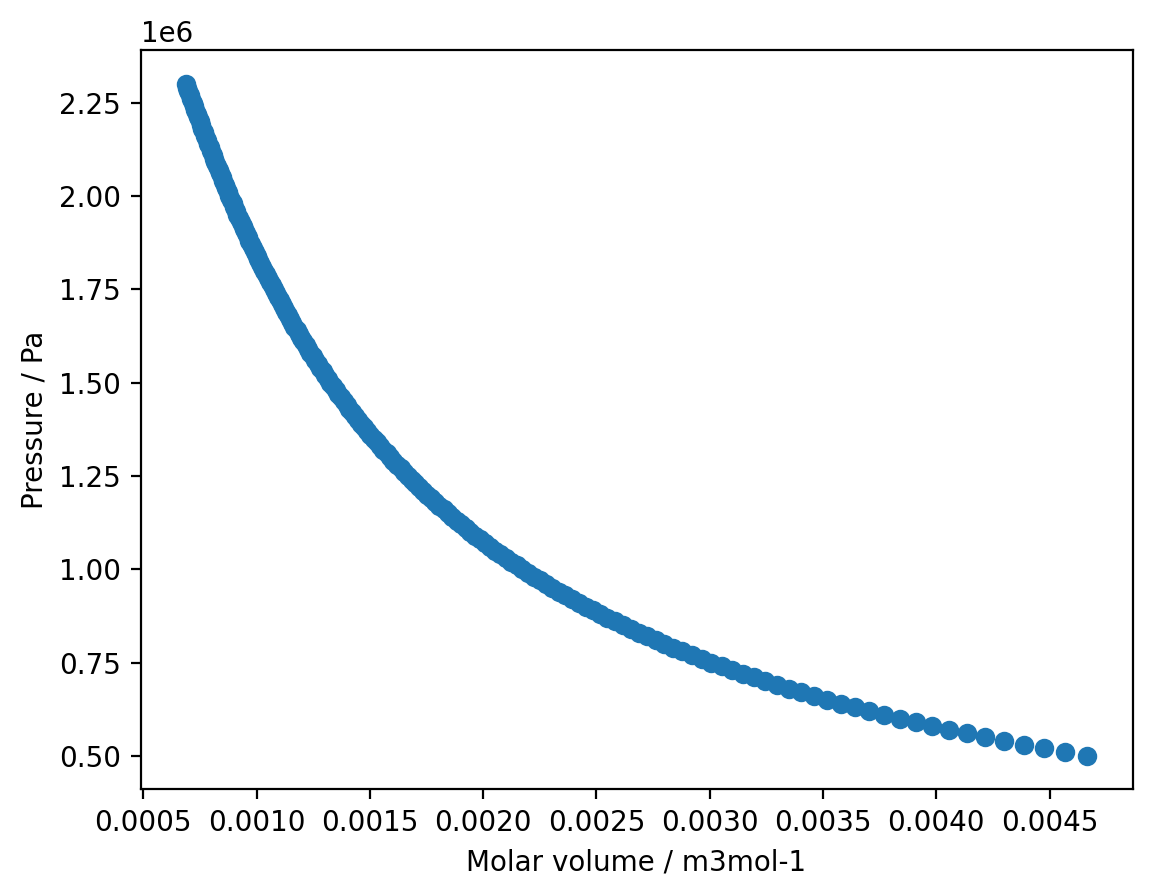

In [2]:
import matplotlib.pyplot as plt
import numpy as np

p, v = np.loadtxt('isotherm.csv', unpack=True, delimiter=',')

p *= 10 ** 5 # Convert from bar to Pa
v /= 10 ** 3 # Convert from Lmol-1 to m3mol-1

plt.plot(v, p, 'o')
plt.xlabel('Molar volume / m3mol-1')
plt.ylabel('Pressure / Pa')

plt.show()

b) Assuming ideality, the isotherm should be well modelled by the ideal gas law:

$$p = \frac{RT}{v},$$

where $p$ is the pressure, $v$ is the molar volume ($V / n$), $R$ is the gas constant and $T$ is the temperature.

Write a function to calculate the pressure with the ideal gas law and use this to model the SF$_{6}$ isotherm between $v = 6.87 \times 10^{-4}\,$m$^{3}\,$mol$^{-1}$ and $v = 4.47 \times 10^{-3}\,$m$^{3}\,$mol$^{-1}$. Plot your modelled isotherm against the experimental data.

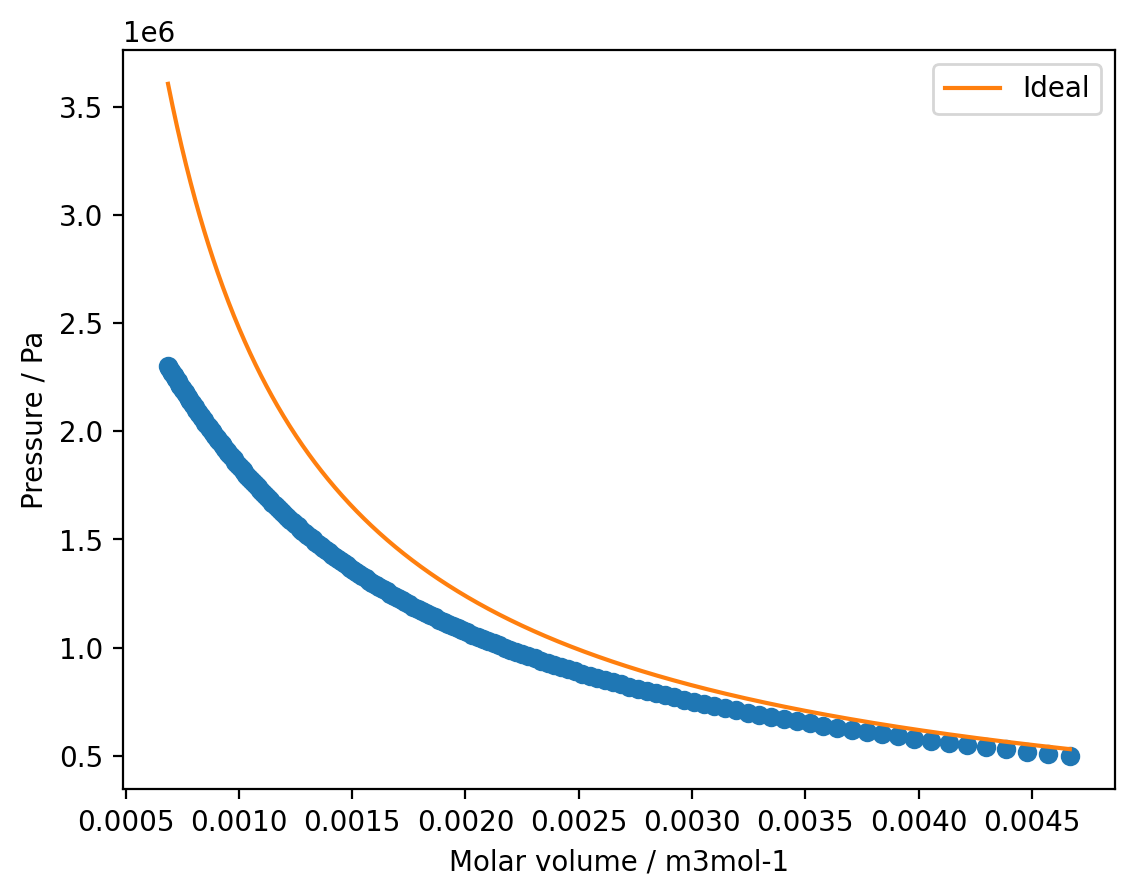

In [3]:
import scipy

def ideal_pressure(v, T):
    """
    Calculate the pressure of an ideal gas for a range of molar volumes.

    Args:
        v (np.ndarray): A numpy array containing the molar volumes for which to evaluate the pressure.
        T (float): The temperature.

    Returns:
        (np.ndarray): A numpy array of the evaluated pressures.
    """

    return scipy.constants.R * T / v
    
temperature = 298
v_model = np.linspace(min(v), max(v), 1000)

p_ideal = ideal_pressure(v_model, temperature)

plt.plot(v, p, 'o')
plt.plot(v_model, p_ideal, label='Ideal')
plt.xlabel('Molar volume / m3mol-1')
plt.ylabel('Pressure / Pa')

plt.legend()
plt.show()

c) Non-ideality due to intermolecular interactions and other factors can be accounted for (in part) by the Van der Waals equation of state:

$$p = \frac{RT}{v - b} - \frac{a}{v^{2}},$$

where $p$ is the pressure, $R$ is the gas constant, $v$ is the molar volume and $a$ and $b$ are system dependent constants that describe the strength of the interactions and excluded volume effects respectively.

Write a function to calculate the pressure with the Van der Waals equation and use this to model the SF$_{6}$ isotherm with $a = 7.857 \times 10^{-1}\,$m$^{6}\,$Pa$\,$mol$^{-2}$ and $b = 8.79 \times 10^{-5}\,$m$^{3}\,$mol$^{-1}$ between $v = 6.87 \times 10^{-4}\,$m$^{3}\,$mol$^{-1}$ and $v = 4.47 \times 10^{-3}\,$m$^{3}\,$mol$^{-1}$. Plot your modelled isotherm and compare this against the idealised curve and the experimental data.

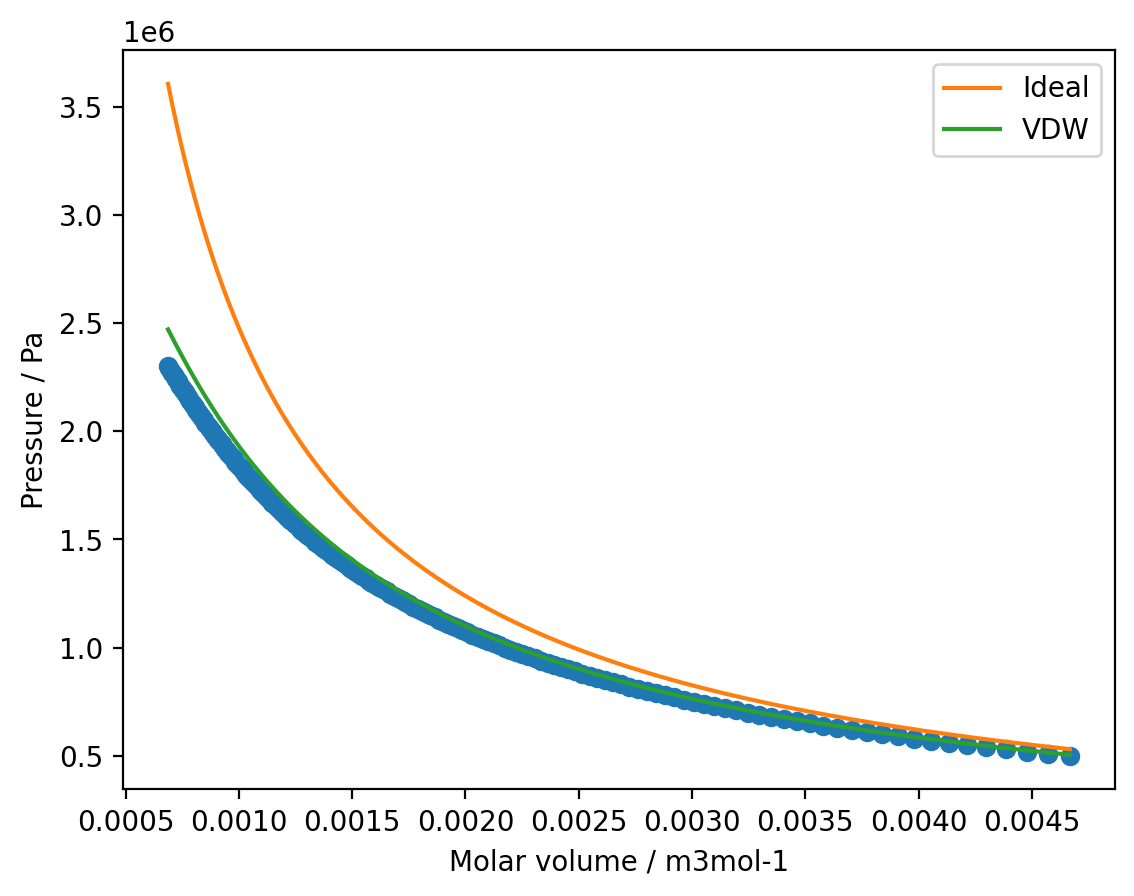

In [4]:
def vdw_pressure(v, T, a, b):
    """
    Calculate the pressure according to the Van der Waals equation for a range of molar volumes.

    Args:
        v (np.ndarray): A numpy array containing the molar volumes for which to evaluate the pressure.
        T (float): The temperature.
        a (float): A system-dependent constant that represents the strength of the intermolecular interactions.
        b (float): A system-dependent constant that accounts for the volume excluded by the finite size of the molecules.

    Returns:
        (np.ndarray): A numpy array of the evaluated pressures.
    """
    
    return (scipy.constants.R * T) / (v - b) - a / v ** 2

a = 7.857e-01
b = 8.79e-05

p_vdw = vdw_pressure(v_model, temperature, a, b)

plt.plot(v, p, 'o')
plt.plot(v_model, p_ideal, label='Ideal')
plt.plot(v_model, p_vdw, label='VDW')
plt.xlabel('Molar volume / m3mol-1')
plt.ylabel('Pressure / Pa')

plt.legend()
plt.show()

**2.** The **mean activity** of ions in solution can be measured experimentally. You have been provided with the mean activity of Na$_{2}$SO$_{4}$ at $298\,$K for a range of ionic strengths: [activity.dat](https://raw.githubusercontent.com/pythoninchemistry/ch12004/main/CH12004/lab_5/activity.dat)

a) Use `matplotlib` to render a scatter plot of the mean activity as a function of the ionic strength $I$.

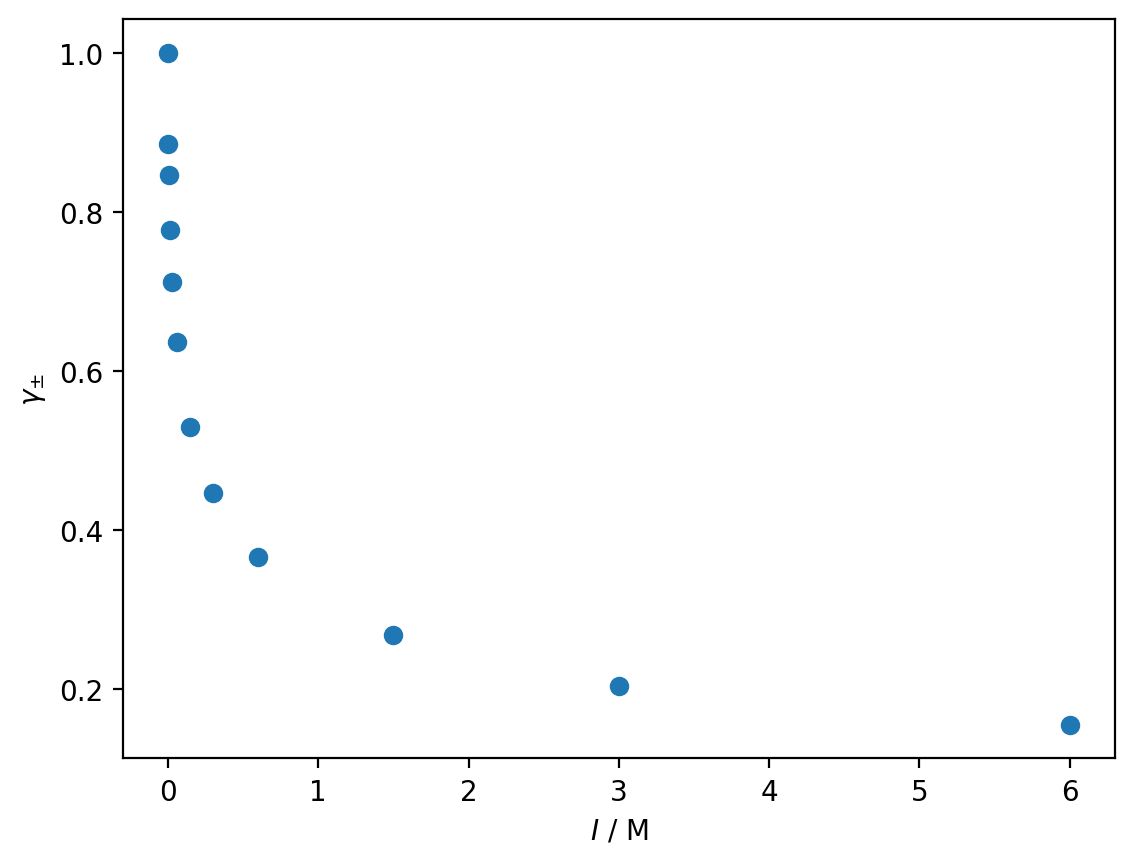

In [5]:
ionic_strength, mean_activity = np.loadtxt('activity.dat', unpack=True)

plt.plot(ionic_strength, mean_activity, 'o')
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.show()

b) The mean activity can be predicted by the Debye-Huckel limiting law:

$$\ln\gamma_{\pm} = -|z_{+}z_{-}|A\sqrt{I},$$

where $z_{+}$ and $z_{-}$ are the charges of the cations and anions, $I$ is the ionic strength and $A$ is a solvent and temperature dependent constant.

Write a function to calculate the mean activity according to the Debye-Huckel limiting law (feel free to reuse your code from [previous exercises](../lab_4/functions.ipynb)). Using $A = 1.179\,$M$^{\frac{1}{2}}$, plot the Debye-Huckel mean activity from $I = 0\,$M to $I = 6\,$M and compare this with the experimental values.

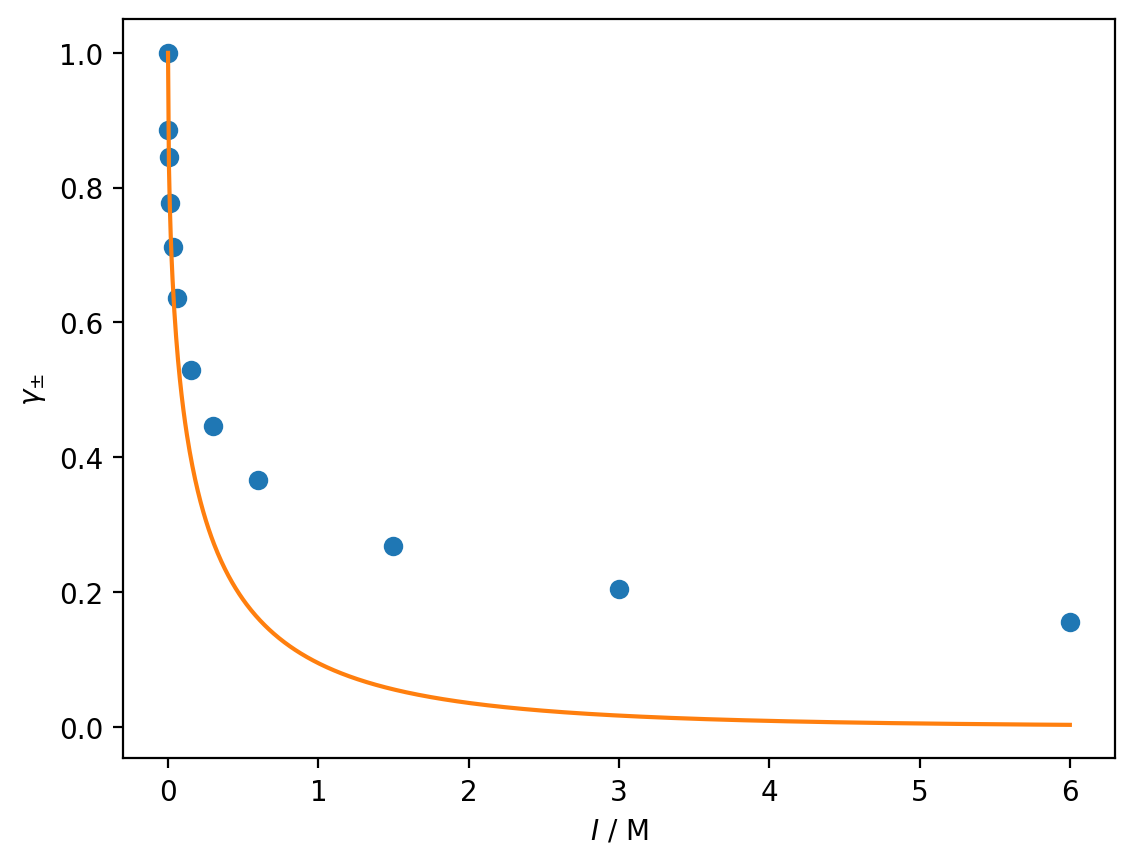

In [6]:
def debye_huckel(I, z_plus, z_minus, A):
    return np.exp(-abs(z_plus * z_minus) * A * np.sqrt(I))

I_dh = np.linspace(0, 6, 1000)
gamma_dh = debye_huckel(I_dh, 1, -2, 1.179)

plt.plot(ionic_strength, mean_activity, 'o')
plt.plot(I_dh, gamma_dh)
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.show()

c) There are several extensions of the Debye-Huckel limiting law that aim to improve its description of the mean activity outside of the dilute limit. One such extension is:

$$\ln\gamma_{\pm} = -|z_{+}z_{-}|\frac{A\sqrt{I}}{1 + Ba_{0}\sqrt{I}},$$

where $B$ is another solvent and temperature dependent constant and $a_{0}$ is the distance of closest approach (expected to be proportional to the closest distance between ions in solution).

Write a function to calculate the mean activity according to the extended Debye-Huckel limiting law. Using $B = 18.3$ and $a_{0} = 0.071$, plot the extended Debye-Huckel mean activity from $I = 0\,$M to $I = 6\,$M and compare this with the experimental values and the original Debye-Huckel limiting law.

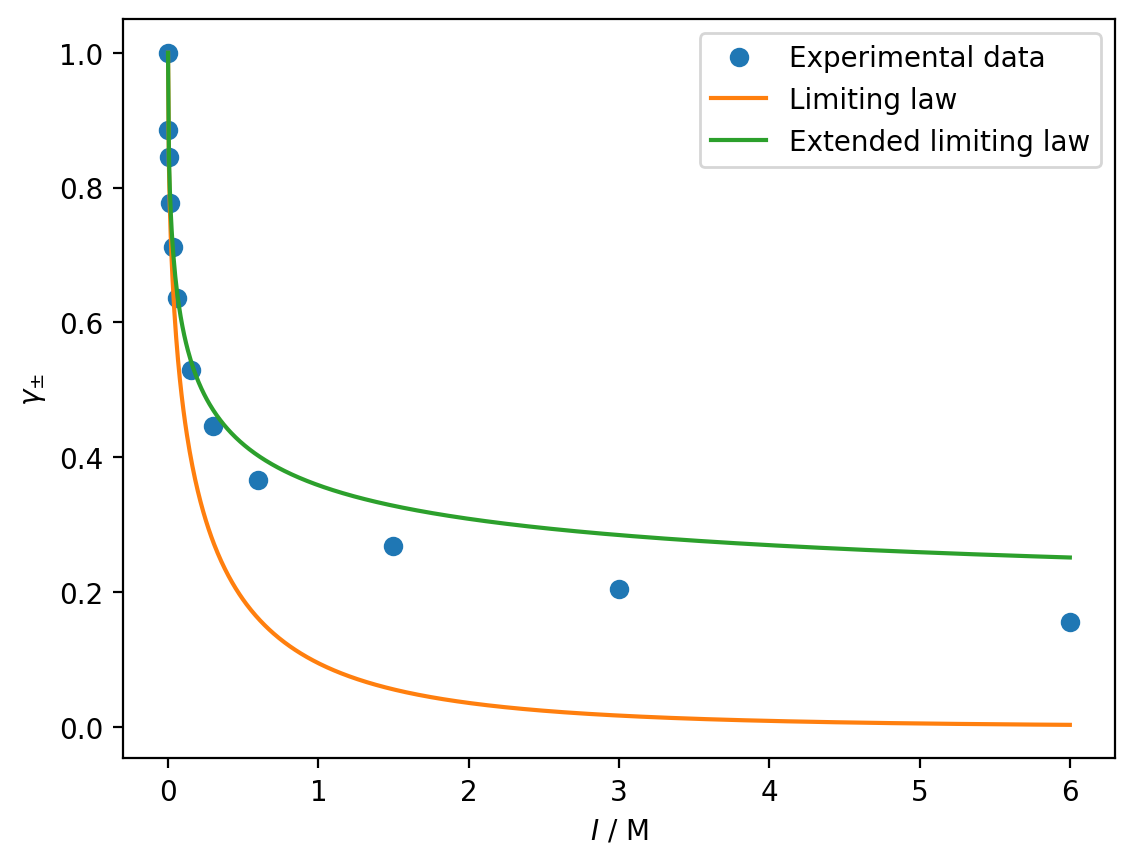

In [7]:
def debye_huckel_extended(I, z_plus, z_minus, A, B, a_0):
    return np.exp(-abs(z_plus * z_minus) * ((A * np.sqrt(I)) / (1 + B * a_0 * np.sqrt(I))))

gamma_dhe = debye_huckel_extended(I_dh, 1, 2, 1.179, 18.3, 0.071)

plt.plot(ionic_strength, mean_activity, 'o', label='Experimental data')
plt.plot(I_dh, gamma_dh, label='Limiting law')
plt.plot(I_dh, gamma_dhe, label='Extended limiting law')
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.legend()
plt.show()